In [1]:
# LINE PROFILE

import matplotlib.pyplot as plt
import skimage as ski
from lmfit.models import LinearModel, LorentzianModel, GaussianModel, VoigtModel, QuadraticModel, SplineModel, PolynomialModel
import pandas as pd
import scipy as sci
import numpy as np
from PIL import Image

In [2]:
df_profiles = pd.DataFrame()

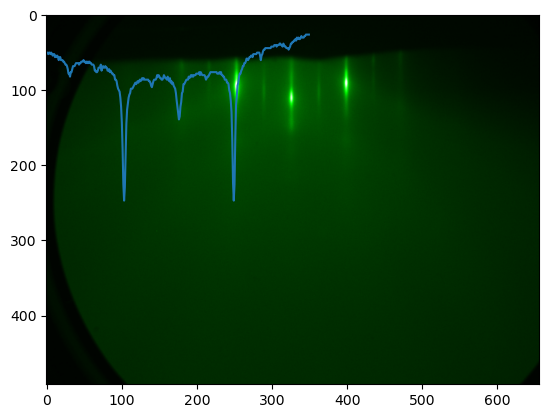

In [241]:
image = ski.io.imread('GM1-805/PCA/00178.png')
profile = image[77,  :][150:500, 1]

fig, ax = plt.subplots()
ax.imshow(image)
ax.plot(profile)


In [242]:
df_profiles['20ML'] = profile.tolist()

df_profiles.head()

,Al2O3,1ML,2ML,3ML,4ML,5ML,6ML,7ML,8ML,9ML,...,21ML,22ML,23ML,24ML,25ML,26ML,27ML,28ML,29ML,30ML
0,38,48,48,48,48,50,48,46,46,46,...,48,50,52,54,50,50,52,50,48,56
1,38,50,48,48,48,48,46,48,48,48,...,50,50,52,48,48,52,50,50,50,58
2,38,48,48,46,48,48,48,46,50,48,...,50,48,50,50,48,50,52,50,50,56
3,38,48,46,48,48,48,48,46,46,48,...,50,50,50,50,52,52,50,50,50,58
4,38,48,48,48,46,48,48,46,48,48,...,50,52,52,52,52,52,52,52,50,56


Index([83, 157, 229], dtype='int64')


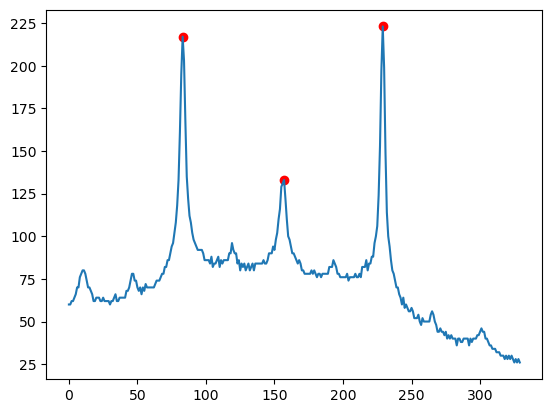

In [8]:
profile1 = profile[20:1000] 
df = pd.DataFrame(profile1) 
df.columns = ['Intensity'] 
df.to_csv('line_profile.txt', sep = 't', index = False) 
df.head()

indices, _ = sci.signal.find_peaks(df['Intensity'], height = 100) 
peaks_df = pd.DataFrame({'PeakIndex':indices, 'PeakValue': df['Intensity'][indices]})

print(peaks_df.index)

fig1, ax1 = plt.subplots() 
ax1.plot(df.index, df['Intensity']) 
ax1.scatter(peaks_df['PeakIndex'], peaks_df['PeakValue'], c = 'red')

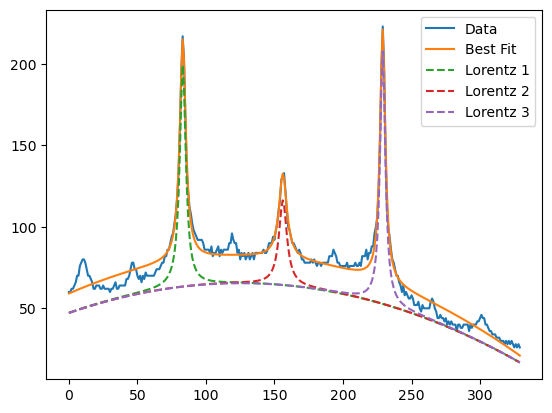

In [10]:
from lmfit.models import GaussianModel, LorentzianModel, VoigtModel
import matplotlib.pyplot as plt

# Assuming df and peaks_df are already defined

background = PolynomialModel(2, prefix='poly_')
pars = background.guess(df['Intensity'], x=df.index)
 
lorentz_1 = LorentzianModel(prefix='lorentz1_')
pars.update(lorentz_1.make_params(center=dict(value=peaks_df['PeakIndex'][83], min=70, max= 90),
                                    amplitude=dict(value=45, min=1, max=3000),
                                     sigma=dict(value=10, min=1, max=20)))  # Width constraint for lorentz_1

lorentz_2 = LorentzianModel(prefix='lorentz_2_')
pars.update(lorentz_2.make_params(center=dict(value=peaks_df['PeakIndex'][157], min=140, max=160),
                                     amplitude=dict(value=200, min=1, max=3000),
                                     sigma=dict(value=10, min=1, max=20)))  # Width constraint for lorentz_2

lorentz_3 = LorentzianModel(prefix='lorentz_3_')
pars.update(lorentz_3.make_params(center=dict(value=peaks_df['PeakIndex'][229], min=210, max=240),
                                 amplitude=dict(value=75, min=1, max=2000),
                                   sigma=dict(value=10, min=1, max=20)))  # Width constraint for lorentz_3

#lorentz_4 = LorentzianModel(prefix='lorentz4_')
#pars.update(lorentz_4.make_params(center=dict(value=peaks_df['PeakIndex'][215], min=200, max=230),
                           #       amplitude=dict(value=100, min=1, max=2000),
                           #        sigma=dict(value=10, min=1, max=20)))  # Width constraint for lorentz_4

#lorentz_5 = LorentzianModel(prefix='lorentz5_')
#pars.update(lorentz_5.make_params(center=dict(value=peaks_df['PeakIndex'][214], min=200, max=220),
           #                        amplitude=dict(value=100, min=20, max=3000),
            #                       sigma=dict(value=10, min=1, max=20)))  # Width constraint for lorentz_5

#lorentz_6 = LorentzianModel(prefix='lorentz6_')
#pars.update(lorentz_6.make_params(center = dict(value = peaks_df['PeakIndex'][336], min = 310, max = 350), 
                                    # amplitude = dict(value = 100, min=20, max = 2000), 
                                         #sigma = dict(value=10, min=1, max=20)))

model = background + lorentz_1 + lorentz_2 + lorentz_3
out = model.fit(df['Intensity'], pars, x=df.index)
comps = out.eval_components(x=df.index)

# Plotting
fig2, ax2 = plt.subplots()
ax2.plot(df.index, df['Intensity'], label='Data')
ax2.plot(df.index, out.best_fit, label='Best Fit')
ax2.plot(df.index, comps['lorentz1_'] +  0.8 * comps['poly_'], '--', label = 'Lorentz 1')
ax2.plot(df.index, comps['lorentz_2_'] + 0.8 * comps['poly_'], '--', label = 'Lorentz 2')
ax2.plot(df.index, comps['lorentz_3_'] + 0.8 * comps['poly_'], '--', label = 'Lorentz 3')
#ax2.plot(df.index, comps['lorentz4_'] +  0.8 * comps['poly_'], '--', label = 'Lorentz 4')
#ax2.plot(df.index, comps['lorentz5_'] +  0.8 * comps['poly_'], '--', label = 'Lorentz 5')
#ax2.plot(df.index, comps['lorentz6_'] + 0.8 * comps['poly_'], '--', label = 'Lorentz 6')
ax2.legend()
plt.show()


In [11]:
print(out.fit_report())




[[Model]]
    (((Model(polynomial, prefix='poly_') + Model(lorentzian, prefix='lorentz1_')) + Model(lorentzian, prefix='lorentz_2_')) + Model(lorentzian, prefix='lorentz_3_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 161
    # data points      = 330
    # variables        = 12
    chi-square         = 7904.41177
    reduced chi-square = 24.8566408
    Akaike info crit   = 1072.10761
    Bayesian info crit = 1117.69673
    R-squared          = 0.97307019
[[Variables]]
    poly_c0:              58.9213965 +/- 0.85265244 (1.45%) (init = 58.06822)
    poly_c1:              0.36384874 +/- 0.01290186 (3.55%) (init = 0.5500048)
    poly_c2:             -0.00145699 +/- 3.8203e-05 (2.62%) (init = -0.002046233)
    lorentz1_amplitude:   1129.05673 +/- 31.9714025 (2.83%) (init = 45)
    lorentz1_center:      83.1100530 +/- 0.06707876 (0.08%) (init = 83)
    lorentz1_sigma:       2.63781375 +/- 0.10004402 (3.79%) (init = 10)
    lorentz1_fwhm:        5.27562750 

In [12]:
# Determination of al2o3 pixel spacing 

difference_al2o3 = out.params['lorentz_2_center'].value - out.params['lorentz1_center'].value
#second_difference = out.params['lorentz5_center'].value - out.params['lorentz1_center'].value
al2o3_lattice_constant = 4.76 / 3 ** (1/2)
al2o3_pixel_difference = difference_al2o3
print(al2o3_lattice_constant)




2.7481872813426187


In [14]:
# Error calcaulation in al2o3

error_al2o3 = np.sqrt((out.params['lorentz_3_center'].stderr) ** 2 + (out.params['lorentz_2_center'].stderr) ** 2)
print(error_al2o3)



0.20936078574358846


In [15]:
# Determination of CuCrO2 lattice constant

CuCrO2_pixel_difference = out.params['lorentz_3_center'].value - out.params['lorentz1_center'].value

print(CuCrO2_pixel_difference)

ratio = al2o3_pixel_difference / CuCrO2_pixel_difference
print(ratio)

CuCrO2_lattice_constant = ratio * al2o3_lattice_constant

print(CuCrO2_lattice_constant)




145.8407579971022
0.5008359003487061
1.3763908513780931


In [16]:
# Error calculation in CuCrO2 pixels
error_10UC = np.sqrt(((out.params['lorentz_3_center'].stderr) ** 2) + ((out.params['lorentz1_center'].stderr) ** 2))
print(error_10UC)



0.08683651886538825


In [17]:
# Error calculation in CuCrO2 lattice constant calculation
error = np.sqrt(((error_al2o3 / al2o3_pixel_difference) ** 2) + ((error_10UC / CuCrO2_pixel_difference) ** 2)) 
print(error)



0.0029274862048071235


In [18]:
error = error * CuCrO2_lattice_constant
print(error)



0.0040293652298320996


In [19]:
df_profiles.head()

,30ML
0,50
1,50
2,50
3,50
4,50


<Axes: >

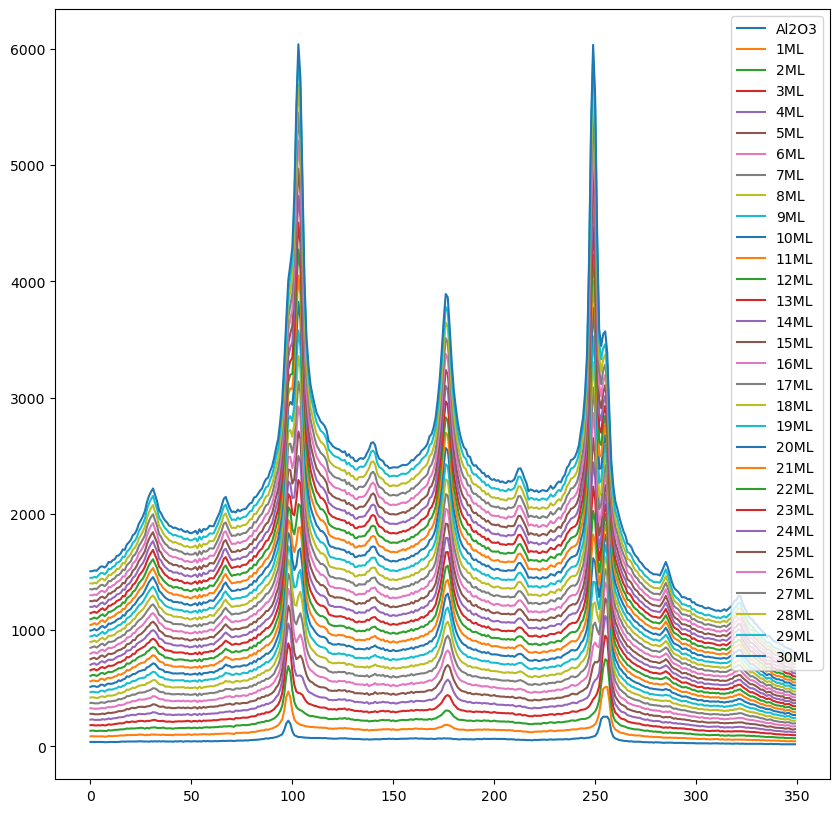

In [243]:
df_profiles.plot(stacked = True, figsize = (10, 10))

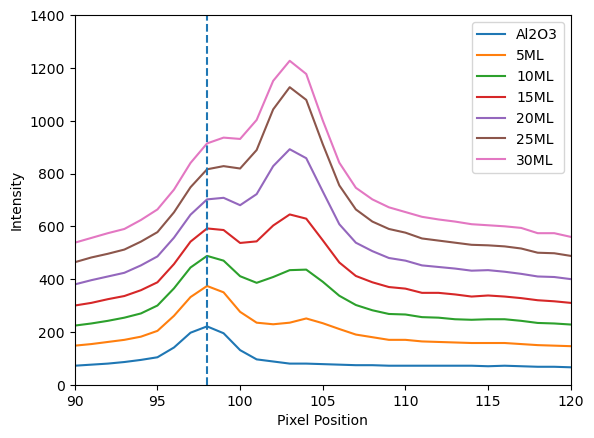

In [247]:
df_profiles.plot(y = ['Al2O3', '5ML', '10ML', '15ML', '20ML', '25ML', '30ML'], stacked = True)
plt.axvline(98, linestyle = '--')
plt.axvline(255, linestyle = '--')
plt.xlim(90, 120)
plt.ylim(0, 1400)
plt.xlabel('Pixel Position')
plt.ylabel('Intensity')
plt.savefig('GM1-805_LineProfile_growthchanges_cutout.png')